# Data Mining Project
# Shaheer Hassan 17-0271
# Muhammad Valeed 17-0081

# Introduction

In this Project we've analyzed the given data and we've trained a model with accuracy more than 98percent.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#flights = pd.read_csv("/content/drive/My Drive/flights.csv")
#airline_names = pd.read_csv("/content/drive/My Drive/airlines.csv")
flights = pd.read_csv("flights.csv")
airline_names = pd.read_csv("airlines.csv")

In [4]:
#s
#Imports for graph plotting
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


# Data Tuning

The data had textual values for cancellation code i.e. A,B,C we converted that to digits. We also inserted a new column 'STATUS' which basically just represents the arrival delay, cancel or divert status.

In [5]:
# creating new variables and renaming 
# flights['DEPARTURE_DATE'] = pd.to_datetime(flights.YEAR*10000+flights.MONTH*100+flights.DAY,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)

#Cancellation cause
flights.loc[flights["CANCELLATION_REASON"] =="A", 'CANCELLATION_CODE'] = 1
flights.loc[flights["CANCELLATION_REASON"] =="B", 'CANCELLATION_CODE'] = 2
flights.loc[flights["CANCELLATION_REASON"] =="C", 'CANCELLATION_CODE'] = 3



for dataset in flights:
    flights.loc[flights['ARRIVAL_DELAY'] <= 15, 'STATUS'] = 0 
    flights.loc[flights['ARRIVAL_DELAY'] >= 15, 'STATUS'] = 1
    flights.loc[flights['ARRIVAL_DELAY'] >= 60, 'STATUS'] = 2
    flights.loc[flights['DIVERTED'] == 1, 'STATUS'] = 3
    flights.loc[flights['CANCELLED'] == 1, 'STATUS'] = 4

Creating a dictionary to provide names for the Airlines given there Airline Codes, from the airline.csv File.

In [6]:
airline_names = np.array(airline_names)
airline_names_dict = {}
for i in airline_names:
    airline_names_dict[i[0]] = i[1] 

# Analysis 

Listed below are the columns of the dataset

In [7]:
for i in range(len(flights.columns)):
    print(i,flights.columns[i],sep='. ')

0. YEAR
1. MONTH
2. DAY
3. DAY_OF_WEEK
4. AIRLINE
5. FLIGHT_NUMBER
6. TAIL_NUMBER
7. ORIGIN_AIRPORT
8. DESTINATION_AIRPORT
9. SCHEDULED_DEPARTURE
10. DEPARTURE_TIME
11. DEPARTURE_DELAY
12. TAXI_OUT
13. WHEELS_OFF
14. SCHEDULED_TIME
15. ELAPSED_TIME
16. AIR_TIME
17. DISTANCE
18. WHEELS_ON
19. TAXI_IN
20. SCHEDULED_ARRIVAL
21. ARRIVAL_TIME
22. ARRIVAL_DELAY
23. ARRIVAL_DELAY_STATUS
24. DIVERTED
25. CANCELLED
26. ON_TIME
27. Y
28. CANCELLATION_REASON
29. AIR_SYSTEM_DELAY
30. SECURITY_DELAY
31. AIRLINE_DELAY
32. LATE_AIRCRAFT_DELAY
33. WEATHER_DELAY
34. CANCELLATION_CODE
35. STATUS


We also described the data using pandas library.

In [8]:
# all columns
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLED,ON_TIME,Y,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_CODE,STATUS
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.014990e+06,1.014990e+06,1.014399e+06,1.014399e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,252613.000000,252613.000000,252613.000000,252613.000000,252613.000000,42921.000000,1.048575e+06
mean,2015.0,2.152901e+00,1.585225e+01,3.918715e+00,2.245425e+03,1.329730e+03,1.338476e+03,9.639047e+00,1.636873e+01,1.361807e+03,...,3.590683e-02,5.847841e-01,1.826107e+00,13.582911,0.060563,18.230899,22.716622,3.340940,1.953985,4.001116e-01
std,0.0,7.532019e-01,8.182568e+00,2.016463e+00,1.790944e+03,4.739702e+02,4.846610e+02,3.742456e+01,9.696722e+00,4.851876e+02,...,1.860579e-01,4.927595e-01,1.438657e+00,26.000084,1.975318,46.170909,42.080796,23.215991,0.563741,8.933465e-01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2015.0,2.000000e+00,9.000000e+00,2.000000e+00,7.520000e+02,9.250000e+02,9.300000e+02,-5.000000e+00,1.100000e+01,9.450000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00
50%,2015.0,2.000000e+00,1.700000e+01,4.000000e+00,1.717000e+03,1.325000e+03,1.334000e+03,-1.000000e+00,1.400000e+01,1.347000e+03,...,0.000000e+00,1.000000e+00,3.000000e+00,3.000000,0.000000,2.000000,3.000000,0.000000,2.000000,0.000000e+00
75%,2015.0,3.000000e+00,2.200000e+01,6.000000e+00,3.471000e+03,1.725000e+03,1.735000e+03,8.000000e+00,1.900000e+01,1.749000e+03,...,0.000000e+00,1.000000e+00,3.000000e+00,18.000000,0.000000,18.000000,29.000000,0.000000,2.000000,0.000000e+00
max,2015.0,3.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,1.000000e+00,1.000000e+00,3.000000e+00,1101.000000,241.000000,1971.000000,1313.000000,1152.000000,3.000000,4.000000e+00


In [9]:
flights.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_CODE,STATUS
1048570,2015,3,25,3,AS,695,N767AS,GEG,SEA,500,...,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1048571,2015,3,25,3,B6,746,N659JB,PSE,JFK,500,...,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1048572,2015,3,25,3,B6,962,N564JB,SJU,BOS,500,...,0,0,NaN,3.0,0.0,9.0,4.0,0.0,NaN,1.0
1048573,2015,3,25,3,B6,1504,N606JB,SJU,JFK,500,...,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1048574,2015,3,25,3,DL,2619,N931DN,FAR,MSP,500,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


We tried analyzing the data and played around with few columns to check the status of different flights. 

In [10]:
 flights[flights.TAXI_OUT==max(flights.TAXI_OUT)]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_CODE,STATUS
638466,2015,2,27,5,AA,125,N4XBAA,DFW,ATL,1415,...,0,0,NaN,202.0,0.0,0.0,0.0,135.0,NaN,2.0


In [11]:
flights[flights.TAXI_IN==max(flights.TAXI_IN)]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_CODE,STATUS
548854,2015,2,21,6,AA,1406,N3GMAA,MIA,JFK,2105,...,0,0,NaN,192.0,0.0,0.0,0.0,68.0,NaN,2.0


In [12]:
flights[flights.ARRIVAL_DELAY==max(flights.ARRIVAL_DELAY)]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_CODE,STATUS
97280,2015,1,23,5,AA,1322,N598AA,BHM,DFW,700,...,0,0,NaN,0.0,0.0,1971.0,0.0,0.0,NaN,2.0


We have made graphs to see the relationship between ARRIVAL_DELAY and other columns that affects it.

Text(0, 0.5, 'ARRIVAL_DELAY')

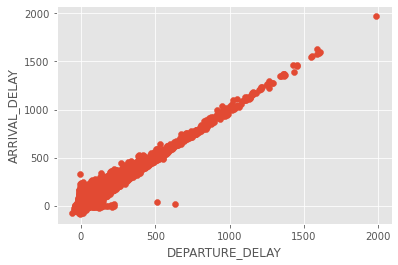

In [13]:
#s
#Graph Plot to understand the scatterness of data along X & Y axes

plt.scatter(flights.DEPARTURE_DELAY,flights.ARRIVAL_DELAY)#took first thousand values

#allColumns = [x for x in flights.columns if(x in df.columns)]
#print (len(allColumns))

plt.xlabel( "DEPARTURE_DELAY" )
plt.ylabel( "ARRIVAL_DELAY"  ) 

Text(0, 0.5, 'ARRIVAL_DELAY')

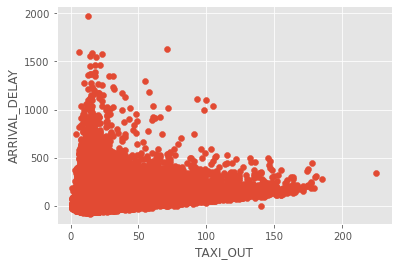

In [14]:
#s
#Graph Plot to understand the scatterness of data along X & Y axes


plt.scatter(flights.TAXI_OUT,flights.ARRIVAL_DELAY)


plt.xlabel("TAXI_OUT") 
plt.ylabel( "ARRIVAL_DELAY"  ) 

Text(0, 0.5, 'ARRIVAL_DELAY')

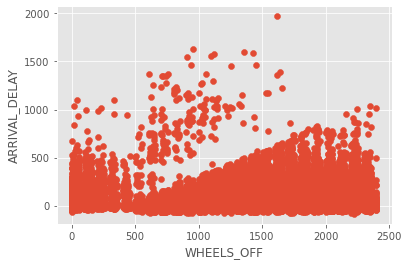

In [15]:
#s
#Graph Plot to understand the scatterness of data along X & Y axes
# Values greater than 500 (approx) influences more 

plt.scatter(flights.WHEELS_OFF,flights.ARRIVAL_DELAY)


plt.xlabel("WHEELS_OFF" )
plt.ylabel( "ARRIVAL_DELAY"  ) 

Text(0, 0.5, 'ARRIVAL_DELAY')

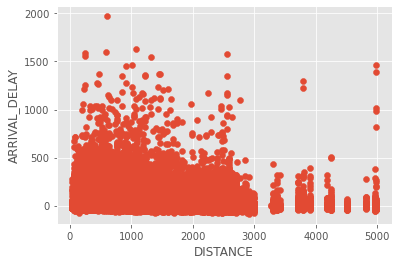

In [16]:
#s
#Graph Plot to understand the scatterness of data along X & Y axes


plt.scatter(flights.DISTANCE,flights.ARRIVAL_DELAY)


plt.xlabel( "DISTANCE" )
plt.ylabel( "ARRIVAL_DELAY"  ) 

Text(0, 0.5, 'ARRIVAL_DELAY')

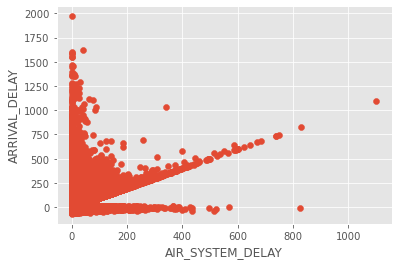

In [17]:
#s
#Graph Plot to understand the scatterness of data along X & Y axes

# Initially this delay, isn't affecting the arrival delay much, but as value increases,
# it increases linearly, but in two different ways

plt.scatter(flights.AIR_SYSTEM_DELAY,flights.ARRIVAL_DELAY)


plt.xlabel("AIR_SYSTEM_DELAY")
plt.ylabel( "ARRIVAL_DELAY"  ) 

Text(0, 0.5, 'ARRIVAL_DELAY')

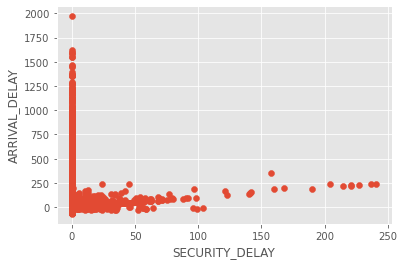

In [18]:
#s
#Graph Plot to understand the scatterness of data along X & Y axes
# This graph suggests, that security delay doesn't effect our decision making very much
# So, we might ignore it

plt.scatter(flights.SECURITY_DELAY,flights.ARRIVAL_DELAY)


plt.xlabel( "SECURITY_DELAY" )
plt.ylabel( "ARRIVAL_DELAY"  ) 

Text(0, 0.5, 'ARRIVAL_DELAY')

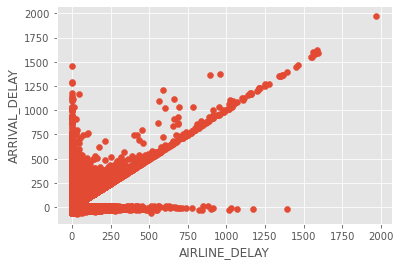

In [19]:
#s
#Graph Plot to understand the scatterness of data along X & Y axes
# Either it is mostly zero, or it grows linearly, but in two different value ranges

plt.scatter(flights.AIRLINE_DELAY,flights.ARRIVAL_DELAY)


plt.xlabel( "AIRLINE_DELAY" )
plt.ylabel( "ARRIVAL_DELAY"  ) 

Text(0, 0.5, 'ARRIVAL_DELAY')

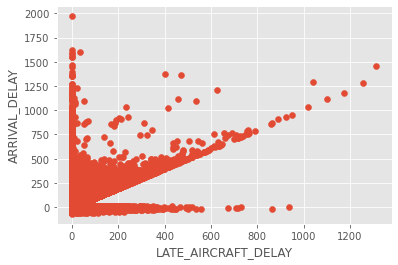

In [20]:
#s
#Graph Plot to understand the scatterness of data along X & Y axes
# Either it is mostly zero, or it grows linearly, but in two different value ranges
# Basically, it isn't really affecting 

plt.scatter(flights.LATE_AIRCRAFT_DELAY,flights.ARRIVAL_DELAY)


plt.xlabel( "LATE_AIRCRAFT_DELAY" )
plt.ylabel( "ARRIVAL_DELAY"  ) 

Text(0, 0.5, 'ARRIVAL_DELAY')

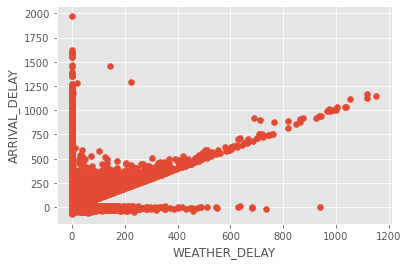

In [21]:
#s
#Graph Plot to understand the scatterness of data along X & Y axes


plt.scatter(flights.WEATHER_DELAY,flights.ARRIVAL_DELAY)


plt.xlabel( "WEATHER_DELAY" )
plt.ylabel( "ARRIVAL_DELAY"  ) 

The following function is used to calculate the percentage of column which has the STATUS code as 0,1,2,3,4

In [22]:
def calculate_percentage_delays(column, delay_type):
    F = flights[flights.STATUS==delay_type]
    col = F[column]
    (unique, counts) = np.unique(col,return_counts = True)
    sorted_idx = np.argsort(-counts)
    counts=counts[sorted_idx]
    unique=unique[sorted_idx]
    frequencies = numpy.asarray((unique, counts)).T
    
    if flights[column].dtypes == np.int64:
        percentage_h = np.array([ [f[0],f[1]/len(flights[flights[column]==f[0]])*100 ] for f in frequencies])
    else:
        percentage_h = np.array([ [str(f[0]),f[1]/len(flights[flights[column]==str(f[0])])*100 ] for f in frequencies])
    
    sorted_idx = np.argsort(percentage_h.T[1])
    percentage_h=percentage_h[sorted_idx]
    return percentage_h[::-1]
    

In [23]:
cpd = calculate_percentage_delays("AIRLINE",0)
print ("Printing Small delays (0-15 minutes) percentage (Delay out of Total Flights)  according to The Airlines")
for i in cpd:
  print ("Small delay percentage of",airline_names_dict[i[0]],"is", i[1])

Printing Small delays (0-15 minutes) percentage (Delay out of Total Flights)  according to The Airlines
Small delay percentage of Hawaiian Airlines Inc. is 85.05332948976651
Small delay percentage of Alaska Airlines Inc. is 85.05163308553936
Small delay percentage of Delta Air Lines Inc. is 82.51627562953536
Small delay percentage of Southwest Airlines Co. is 80.50364865469848
Small delay percentage of Skywest Airlines Inc. is 78.27124173762175
Small delay percentage of Virgin America is 77.7723593094704
Small delay percentage of US Airways Inc. is 76.74577195853792
Small delay percentage of United Air Lines Inc. is 76.74331883157241
Small delay percentage of American Airlines Inc. is 75.82072921610302
Small delay percentage of Atlantic Southeast Airlines is 74.02420792881716
Small delay percentage of Spirit Air Lines is 71.6751269035533
Small delay percentage of JetBlue Airways is 66.78939000920425
Small delay percentage of Frontier Airlines Inc. is 64.28620856688119
Small delay perce

In [24]:
cpd = calculate_percentage_delays("AIRLINE",1)
print ("Printing Medium delays (15-60 minutes) percentage (Delay out of Total Flights)  according to The Airlines")
for i in cpd:
  print ("Medium delay percentage of",airline_names_dict[i[0]],"is", i[1])

Printing Medium delays (15-60 minutes) percentage (Delay out of Total Flights)  according to The Airlines
Medium delay percentage of Frontier Airlines Inc. is 21.569441561137637
Medium delay percentage of American Eagle Airlines Inc. is 18.085022602340565
Medium delay percentage of JetBlue Airways is 17.34582880093716
Medium delay percentage of Spirit Air Lines is 17.233502538071065
Medium delay percentage of United Air Lines Inc. is 14.400813605288434
Medium delay percentage of US Airways Inc. is 14.169394435351881
Medium delay percentage of American Airlines Inc. is 13.978705404122731
Medium delay percentage of Atlantic Southeast Airlines is 13.907851366198958
Medium delay percentage of Hawaiian Airlines Inc. is 13.274718939175557
Medium delay percentage of Skywest Airlines Inc. is 13.043478260869565
Medium delay percentage of Virgin America is 12.874280698332196
Medium delay percentage of Southwest Airlines Co. is 12.537046156601155
Medium delay percentage of Delta Air Lines Inc. is

In [25]:
cpd = calculate_percentage_delays("AIRLINE",2)
print ("Printing High delays (>60 minutes) percentage (Delay out of Total Flights)  according to The Airlines")
for i in cpd:
  print ("High delay percentage of",airline_names_dict[i[0]],"is", i[1])

Printing High delays (>60 minutes) percentage (Delay out of Total Flights)  according to The Airlines
High delay percentage of JetBlue Airways is 9.666555099991632
High delay percentage of American Eagle Airlines Inc. is 9.645765408180946
High delay percentage of Spirit Air Lines is 8.685279187817258
High delay percentage of Atlantic Southeast Airlines is 6.465354203065616
High delay percentage of Skywest Airlines Inc. is 6.312881295201455
High delay percentage of Virgin America is 6.232322247147176
High delay percentage of United Air Lines Inc. is 5.9573987230917
High delay percentage of American Airlines Inc. is 5.372139570393909
High delay percentage of US Airways Inc. is 4.69721767594108
High delay percentage of Delta Air Lines Inc. is 4.571169646367386
High delay percentage of Southwest Airlines Co. is 3.8845861127277614
High delay percentage of Alaska Airlines Inc. is 3.589088095798715
High delay percentage of Frontier Airlines Inc. is 12.615043941595738
High delay percentage of 

In [26]:
days = {1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",7:"Sunday"}

In [27]:
cpd = calculate_percentage_delays("DAY_OF_WEEK",0)
print ("Printing Small delays (0-15 minutes) percentage (Delay out of Total Flights)  according to The Days of the week")
for i in cpd:
  print ("Small delay percentage on",days[i[0]],"is", i[1])

Printing Small delays (0-15 minutes) percentage (Delay out of Total Flights)  according to The Days of the week
Small delay percentage on Saturday is 81.66842352289427
Small delay percentage on Wednesday is 79.22269869686498
Small delay percentage on Friday is 77.50767310327966
Small delay percentage on Tuesday is 77.38095238095238
Small delay percentage on Thursday is 75.6540555161105
Small delay percentage on Sunday is 74.88973556553478
Small delay percentage on Monday is 72.93294738967866


In [28]:
cpd = calculate_percentage_delays("DAY_OF_WEEK",1)
print ("Printing Medium delays (15-60 minutes) percentage (Delay out of Total Flights)  according to The Days of the week")
for i in cpd:
  print ("Medium delay percentage on",days[i[0]],"is", i[1])

Printing Medium delays (15-60 minutes) percentage (Delay out of Total Flights)  according to The Days of the week
Medium delay percentage on Thursday is 15.10768502552659
Medium delay percentage on Friday is 14.779329914485917
Medium delay percentage on Monday is 14.09347098385034
Medium delay percentage on Sunday is 13.983064984286067
Medium delay percentage on Wednesday is 13.19302774192653
Medium delay percentage on Tuesday is 12.329660587639312
Medium delay percentage on Saturday is 11.526002754545384


In [29]:
cpd = calculate_percentage_delays("DAY_OF_WEEK",2)
print ("Printing Large delays (>60 minutes) percentage (Delay out of Total Flights)  according to The Days of the week")
for i in cpd:
  print ("Large delay percentage on",days[i[0]],"is", i[1])

Printing Large delays (>60 minutes) percentage (Delay out of Total Flights)  according to The Days of the week
Large delay percentage on Monday is 6.749322252752296
Large delay percentage on Sunday is 6.350297263573703
Large delay percentage on Thursday is 6.024951820671467
Large delay percentage on Tuesday is 5.80483789260385
Large delay percentage on Friday is 5.8000295985535315
Large delay percentage on Wednesday is 4.610239116255187
Large delay percentage on Saturday is 4.024867851069887


In [30]:
# copy data to new dataframe and fill na values with 0. 
df = flights.copy()
df = df.fillna(0)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_CODE,STATUS
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Tuning Part 2

Some of the columns in the dataset did not help us training our model. We have dropped them and commented the reason to drop them alongside it

In [31]:
# dropping the unwanted data   
df = df.drop("YEAR",axis=1) # Converted to date
df = df.drop("CANCELLATION_CODE",axis=1) # No reason required why the flight was cancelled
df = df.drop("ARRIVAL_DELAY",axis=1) # converted to status
df = df.drop("DAY_OF_WEEK",axis=1) # Converted to date
df = df.drop("MONTH",axis=1) # Converted to date
df = df.drop("DAY",axis=1) # Converted to date
df = df.drop("AIRLINE",axis=1) # Names of airline don't matter
df = df.drop("AIR_TIME",axis=1) # We wouldn't have this information before the flight has landed
df = df.drop("ARRIVAL_DELAY_STATUS",axis=1) # Converted to Status
df = df.drop("SCHEDULED_DEPARTURE",axis=1) # Converted to Status
df = df.drop("DEPARTURE_TIME",axis=1) # Converted to Status
# df = df.drop("DEPARTURE_DELAY",axis=1)
df = df.drop("ARRIVAL_TIME",axis=1) # We wouldn't have this information before the flight has landed
df = df.drop("SCHEDULED_ARRIVAL",axis=1) # Does not effect the status of flight
df = df.drop("CANCELLATION_REASON",axis=1) # converted to cancellation code
df = df.drop("ELAPSED_TIME",axis=1) # We wouldn't have this information before the flight has landed
df = df.drop("SCHEDULED_TIME",axis=1) # Does not effect the status of flight
df = df.drop("DIVERTED",axis=1) # converted to status
df = df.drop("CANCELLED",axis=1) #converted to status
# df = df.drop("DISTANCE",axis=1)
df = df.drop("Y",axis=1)
df = df.drop("WHEELS_ON",axis=1) # We wouldn't have this information before the flight has landed
df = df.drop("TAXI_IN",axis=1)# We wouldn't have this information before the flight has landed
df = df.drop("FLIGHT_NUMBER",axis=1) # Does not effect the status of flight
df = df.drop("ORIGIN_AIRPORT",axis=1)# Does not effect the status of flight
df = df.drop("DESTINATION_AIRPORT",axis=1) # Does not effect the status of flight( it is catered in distance)
df = df.drop("ON_TIME",axis=1) # converted to status
df = df.drop("TAIL_NUMBER",axis=1)# Does not effect the status of flight

# Training the Model

In [32]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,DISTANCE,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,STATUS
594416,-5.0,9.0,1903.0,425,0.0,0.0,0.0,0.0,0.0,0.0
448229,2.0,9.0,1426.0,371,0.0,0.0,0.0,0.0,0.0,0.0
173773,-6.0,14.0,928.0,606,0.0,0.0,0.0,0.0,0.0,0.0
821452,-5.0,26.0,728.0,1167,0.0,0.0,0.0,0.0,0.0,3.0
875264,15.0,11.0,1114.0,874,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data=np.array(df)
data.shape

(1048575, 10)

In [34]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(1048575, 9)
(1048575,)


In [35]:
Xtrain, Xtest, Xvalidate  = np.split(X, [int(.7*len(X)), int(.8*len(X))])
ytrain, ytest, yvalidate  = np.split(y, [int(.7*len(y)), int(.8*len(y))])

In [36]:
print(Xtrain.shape)
print(Xvalidate.shape)
print(Xtest.shape)
print()
print(ytrain.shape)
print(yvalidate.shape)
print(ytest.shape)

(734002, 9)
(209715, 9)
(104858, 9)

(734002,)
(209715,)
(104858,)


We decided to use the Random Forest Classifier in order to train our model. The graphs above showed a pattern that was linear in some scenarios so we first decided to apply linear regression but we were not happy with the results. This was primarily due to non linear part of the attributes we used. So we decided to train the data using voting classifier in which we used linear regression, decision trees and gnb. The results were not up to the mark. As you can see from the graphs, although some data is linear but other showed different shapes so decided to go with decision trees and random forests since these classifiers use entropy and IG to predict the labels and it would well suit our data. We were right and obtained good results with decision tree and even better results with random forests

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=99)
rf = rf.fit(Xtrain, ytrain)

In [38]:
res = np.array(rf.predict(Xvalidate))

In [39]:
from sklearn.metrics import classification_report
print("RANDOM FOREST")
print(classification_report(yvalidate, res))

RANDOM FOREST
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    160992
         1.0       0.96      0.98      0.97     28732
         2.0       0.99      0.98      0.98     11947
         3.0       0.66      0.17      0.27       450
         4.0       1.00      0.91      0.95      7594

    accuracy                           0.99    209715
   macro avg       0.92      0.81      0.83    209715
weighted avg       0.99      0.99      0.98    209715



# Cross Validation

We cross validated our model using Xvalidation dataset and tuned our model on following parameters:
1. No. of trees
2. No. of features
3. Depth

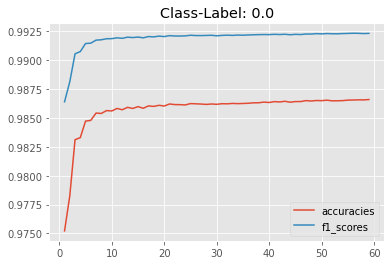

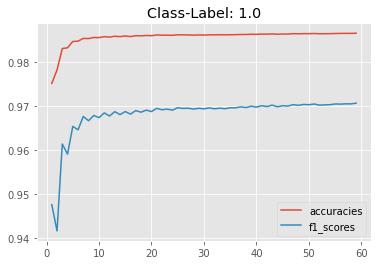

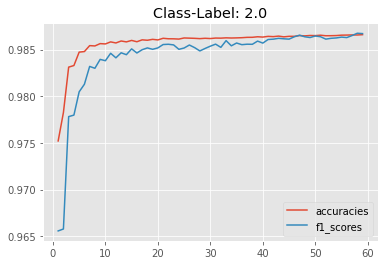

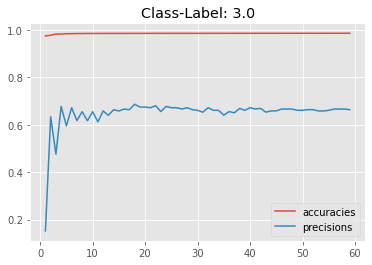

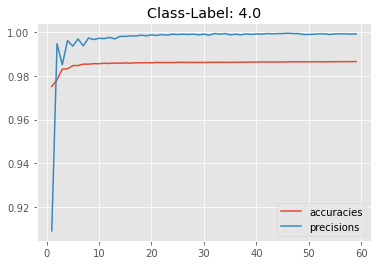

In [40]:
from sklearn.ensemble import RandomForestClassifier

max_estimators = 60


classes = [0.0,1.0,2.0,3.0,4.0]

tree_used = []
accuracies=[]
f1_scores={
            '0.0':[],
            '1.0':[],
            '2.0':[]
          }
precisions={
              '3.0':[],
              '4.0':[]
          }
for i in range(1,max_estimators):
    tree_used.append(i)
    rf = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=99)
    rf = rf.fit(Xtrain, ytrain)
    res = np.array(rf.predict(Xvalidate))
    report = classification_report(yvalidate, res,output_dict=True)
    acc = report['accuracy']
    accuracies.append(acc)
    for c in classes:
        if c in range(0,3):
            f1 = report[str(c)]['f1-score']
            f1_scores[str(c)].append(f1)
        else:
            p = report[str(c)]['precision']
            precisions[str(c)].append(p)


for c in classes:
    plt.plot(tree_used, accuracies)
    if c in range(0,3):
        plt.plot(tree_used, f1_scores[str(c)])
        plt.legend(['accuracies', 'f1_scores'], loc='best')
    else:
        plt.plot(tree_used, precisions[str(c)])
        plt.legend(['accuracies', 'precisions'], loc='best')
    plt.title("Class-Label: "+str(c))
    plt.show()


In [41]:
idx = np.argmax(accuracies)
print("Best No. of trees: ", idx+1)
print("acc: ", accuracies[idx])

Best No. of trees:  59
acc:  0.9865960946999499


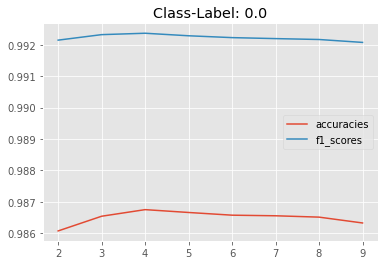

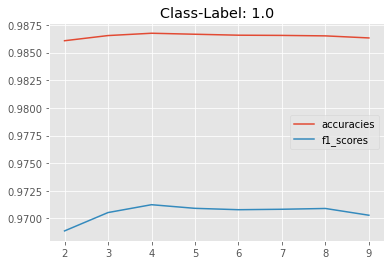

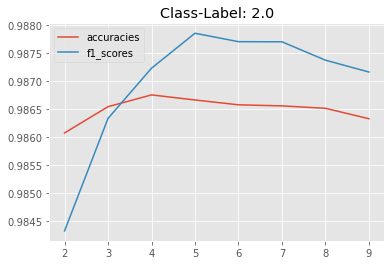

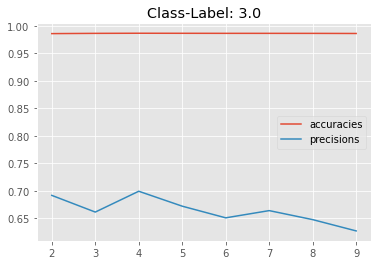

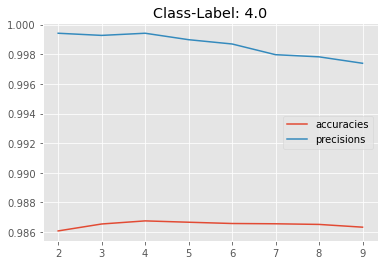

In [42]:
n_features = [2,3,4,5,6,7,8,9]
accuracies=[]
f1_scores={
            '0.0':[],
            '1.0':[],
            '2.0':[]
          }
precisions={
              '3.0':[],
              '4.0':[]
          }
for f in n_features:
    rf = RandomForestClassifier(n_estimators=55,n_jobs=-1,max_features=f,random_state=99)
    rf = rf.fit(Xtrain, ytrain)
    res = np.array(rf.predict(Xvalidate))
    report = classification_report(yvalidate, res,output_dict=True)
    acc = report['accuracy']
    accuracies.append(acc)
    for c in classes:
        if c in range(0,3):
            f1 = report[str(c)]['f1-score']
            f1_scores[str(c)].append(f1)
        else:
            p = report[str(c)]['precision']
            precisions[str(c)].append(p)

for c in classes:
    plt.plot(n_features, accuracies)
    if c in range(0,3):
        plt.plot(n_features, f1_scores[str(c)])
        plt.legend(['accuracies', 'f1_scores'], loc='best')
    else:
        plt.plot(n_features, precisions[str(c)])
        plt.legend(['accuracies', 'precisions'], loc='best')
    plt.title("Class-Label: "+str(c))
    plt.show()
    

In [43]:
idx = np.argmax(accuracies)
print("Best No. of features: ", n_features[idx])
print("acc: ", accuracies[idx])

Best No. of features:  4
acc:  0.9867534511122237


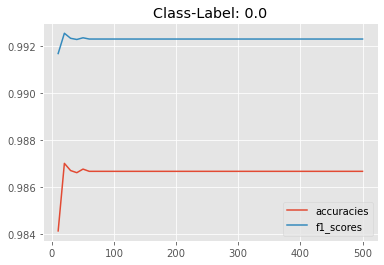

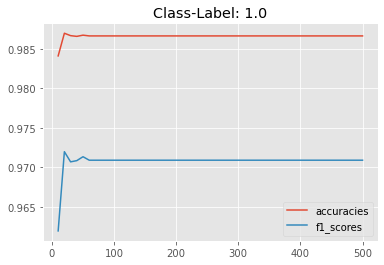

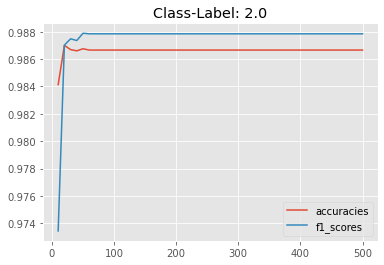

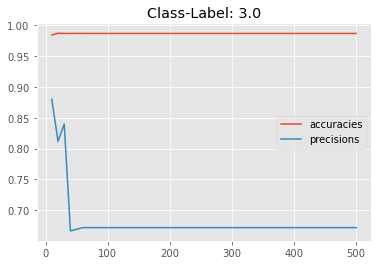

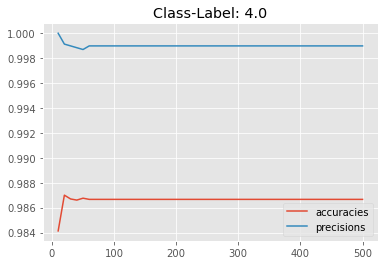

In [44]:
depths = [10,20,30,40,50,60,70,80,90,100,200,300,400,500]
accuracies=[]
f1_scores={
            '0.0':[],
            '1.0':[],
            '2.0':[]
          }
precisions={
              '3.0':[],
              '4.0':[]
          }
for d in depths:
    rf = RandomForestClassifier(n_estimators=55,n_jobs=-1,max_features=5,max_depth=d,random_state=99)
    rf = rf.fit(Xtrain, ytrain)
    res = np.array(rf.predict(Xvalidate))
    report = classification_report(yvalidate, res,output_dict=True)
    acc = report['accuracy']
    accuracies.append(acc)
    for c in classes:
        if c in range(0,3):
            f1 = report[str(c)]['f1-score']
            f1_scores[str(c)].append(f1)
        else:
            p = report[str(c)]['precision']
            precisions[str(c)].append(p)

for c in classes:
    plt.plot(depths, accuracies)
    if c in range(0,3):
        plt.plot(depths, f1_scores[str(c)])
        plt.legend(['accuracies', 'f1_scores'], loc='best')
    else:
        plt.plot(depths, precisions[str(c)])
        plt.legend(['accuracies', 'precisions'], loc='best')
    plt.title("Class-Label: "+str(c))
    plt.show()
    

In [45]:
idx = np.argmax(accuracies)
print("Best depth: ", depths[idx])
print("acc: ", accuracies[idx])

Best depth:  20
acc:  0.9870014066709583


# Trained Model with Tuned Hyperparameters

In [46]:
rf = RandomForestClassifier(n_estimators=55,n_jobs=-1,max_features=5,max_depth=20,random_state=99)
rf = rf.fit(Xtrain, ytrain)

# Confusion Matrix

In [47]:
res = np.array(rf.predict(Xtest))
print(classification_report(ytest, res))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     80833
         1.0       0.96      0.98      0.97     14292
         2.0       0.99      0.99      0.99      5841
         3.0       0.79      0.19      0.30       242
         4.0       1.00      0.90      0.95      3650

    accuracy                           0.99    104858
   macro avg       0.95      0.81      0.84    104858
weighted avg       0.99      0.99      0.99    104858



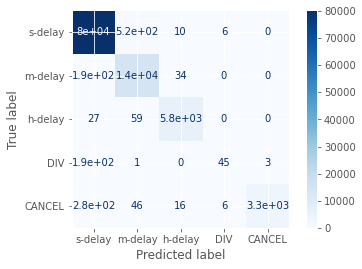

In [48]:
class_names = ['s-delay','m-delay','h-delay','DIV','CANCEL']
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
plot_confusion_matrix(rf, Xtest, ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)